In [16]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

Comenzamos cargando los datos 

In [2]:
aviones = pd.read_csv('C:/Users/PC/Desktop/Proyecto2/AccidentesAviones.csv')

Analisis exploratorio para conocer un poco los datos 

In [3]:
aviones.head()

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


Revisamos el numero de registros que tenemos 

In [4]:

aviones.shape[0]

5008

Revisamos si existen nulos en las columnas y de ser cual es el porcentaje de nulos que tenemos 

In [5]:
aviones.isnull().sum()

Unnamed: 0                0
fecha                     0
HORA declarada            0
Ruta                      0
OperadOR                  0
flight_no                 0
route                     0
ac_type                   0
registration              0
cn_ln                     0
all_aboard                0
PASAJEROS A BORDO         0
crew_aboard               0
cantidad de fallecidos    0
passenger_fatalities      0
crew_fatalities           0
ground                    0
summary                   0
dtype: int64

In [6]:
aviones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5008 non-null   int64 
 1   fecha                   5008 non-null   object
 2   HORA declarada          5008 non-null   object
 3   Ruta                    5008 non-null   object
 4   OperadOR                5008 non-null   object
 5   flight_no               5008 non-null   object
 6   route                   5008 non-null   object
 7   ac_type                 5008 non-null   object
 8   registration            5008 non-null   object
 9   cn_ln                   5008 non-null   object
 10  all_aboard              5008 non-null   object
 11  PASAJEROS A BORDO       5008 non-null   object
 12  crew_aboard             5008 non-null   object
 13  cantidad de fallecidos  5008 non-null   object
 14  passenger_fatalities    5008 non-null   object
 15  crew

In [11]:
# Estadísticas descriptivas de columnas numéricas
numeric_columns = ['all_aboard', 'PASAJEROS A BORDO', 'crew_aboard', 'cantidad de fallecidos', 'passenger_fatalities', 'crew_fatalities', 'ground']
print(aviones[numeric_columns].describe())

       all_aboard PASAJEROS A BORDO crew_aboard cantidad de fallecidos  \
count        5008              5008        5008                   5008   
unique        245               235          35                    200   
top             3                 0           3                      1   
freq          280               869         954                    384   

       passenger_fatalities crew_fatalities ground  
count                  5008            5008   5008  
unique                  191              29     52  
top                       0               2      0  
freq                   1040             892   4716  


In [13]:
# Distribución de variables categóricas
categorical_columns = ['OperadOR', 'ac_type', 'route']
for column in categorical_columns:
    print(aviones[column].value_counts())

Aeroflot                            253
Military - U.S. Air Force           141
Air France                           74
Deutsche Lufthansa                   63
United Air Lines                     44
                                   ... 
Sierra Pacific Airlines               1
Pathet Lao Airlines                   1
Military - West German Air Force      1
Cessnyca                              1
Kamchatka Aviation Enterprise         1
Name: OperadOR, Length: 2268, dtype: int64
Douglas DC-3                                333
de Havilland Canada DHC-6 Twin Otter 300     81
Douglas C-47A                                70
Douglas C-47                                 64
Douglas DC-4                                 41
                                           ... 
Vickers Viscount 759D                         1
H-21B                                         1
Avro 685 York C1                              1
Piper PA-24-250 Comanche                      1
Antonov An 26B-100                   

Dado que tenemos las columnas fecha y hora declarada lo primero que haremos es convertirlas en el tipo de formato adecuado "datetime"

In [ ]:
# Convertir la columna 'fecha' al formato deseado
aviones['fecha'] = pd.to_datetime(aviones['fecha']).dt.strftime('%Y-%d-%m')


# Reemplazar "?" con NaN
aviones["HORA declarada"] = aviones["HORA declarada"].replace("?", np.nan)

# Convertir a tipo de dato datetime
aviones["HORA declarada"] = pd.to_datetime(aviones["HORA declarada"], format="%H%M", errors="coerce")

# Obtener solo el componente de hora
aviones["HORA declarada"] = aviones["HORA declarada"].dt.time

Revisaremos el numero de accidentes por año 

In [50]:
# Extraer el año de la columna 'fecha' y crear una nueva columna 'año'
aviones['año'] = aviones['fecha'].apply(lambda x: x.split("-")[0])

In [53]:
# Contar el número de accidentes por año
accidentes_por_año = aviones['año'].value_counts().sort_index()

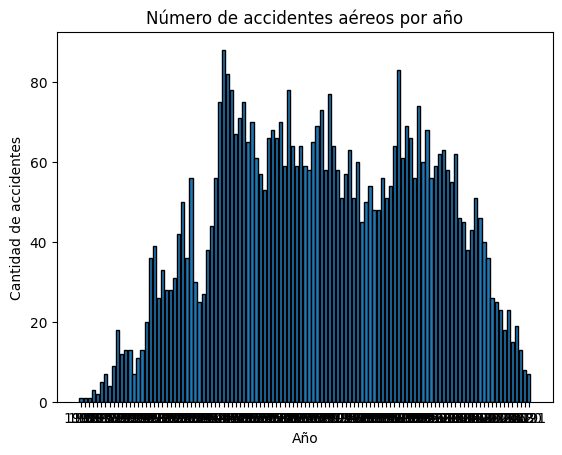

In [54]:
# Crear el histograma
plt.bar(accidentes_por_año.index, accidentes_por_año.values, edgecolor='black')

plt.title('Número de accidentes aéreos por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de accidentes')

plt.show()

Al ser demasiados años crearemos un histograma con solo los 10 años con mayor numero de accidentes registrados

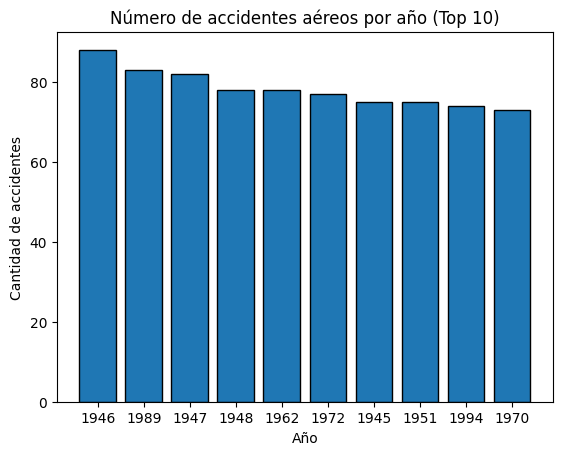

In [55]:
# Obtener los 10 años con el mayor número de accidentes
top_10_anios = accidentes_por_año.nlargest(10)

# Crear el histograma solo para los 10 años con el mayor número de accidentes
plt.bar(top_10_anios.index, top_10_anios.values, edgecolor='black')

plt.title('Número de accidentes aéreos por año (Top 10)')
plt.xlabel('Año')
plt.ylabel('Cantidad de accidentes')

plt.show()


Veamos cuales son las rutas con mayor numero de accidentes

In [32]:
df_grouped = aviones.groupby('Ruta')['Ruta'].count().reset_index(name='num_accidentes')
top_10 = df_grouped.sort_values('num_accidentes', ascending=False).head(10)

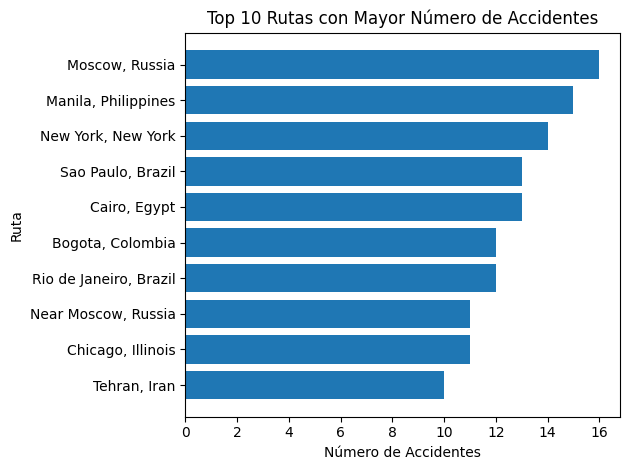

In [34]:


# Crear el gráfico de barras horizontales
plt.barh(top_10['Ruta'], top_10['num_accidentes'])
plt.xlabel('Número de Accidentes')
plt.ylabel('Ruta')
plt.title('Top 10 Rutas con Mayor Número de Accidentes')

# Ajustar el espaciado de las etiquetas en el eje y
plt.gca().invert_yaxis()
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Trataremos de verl el numero de incidentes fatales que hay por operador

In [59]:
# Convertir la columna 'cantidad de fallecidos' a tipo numérico
aviones['cantidad de fallecidos'] = pd.to_numeric(aviones['cantidad de fallecidos'], errors='coerce')


In [60]:
accidentes_fatales = aviones[aviones['cantidad de fallecidos'] > 0]
accidentes_fatales_por_operador = accidentes_fatales.groupby('OperadOR').size()
total_accidentes_por_operador = aviones.groupby('OperadOR').size()
porcentaje_accidentes_fatales = (accidentes_fatales_por_operador / total_accidentes_por_operador) * 100

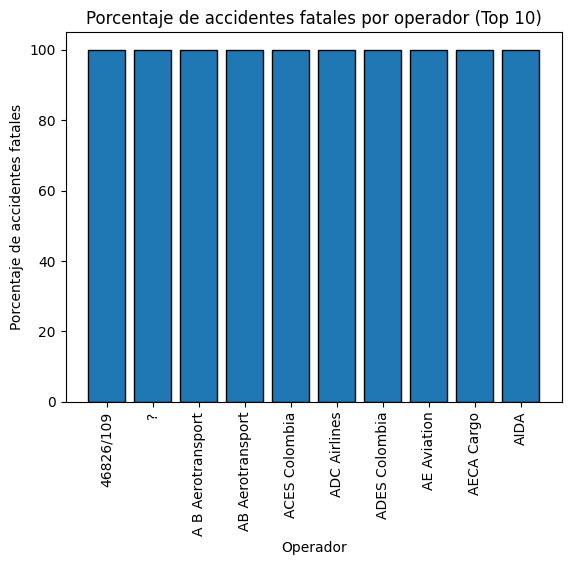

In [65]:
# Ordenar los porcentajes de accidentes fatales de forma descendente y seleccionar los 10 mayores
top_10_operadores = porcentaje_accidentes_fatales.nlargest(10)

# Crear el gráfico de barras para los 10 mayores operadores
plt.bar(top_10_operadores.index, top_10_operadores.values, edgecolor='black')
plt.title('Porcentaje de accidentes fatales por operador (Top 10)')
plt.xlabel('Operador')
plt.ylabel('Porcentaje de accidentes fatales')
plt.xticks(rotation=90)
plt.show()


0     869
?     221
4     170
2     162
5     140
7     130
3     130
10    128
9     128
8     126
Name: PASAJEROS A BORDO, dtype: int64
0      869
?      221
4      170
2      162
5      140
      ... 
172      1
509      1
191      1
307      1
184      1
Name: PASAJEROS A BORDO, Length: 235, dtype: int64


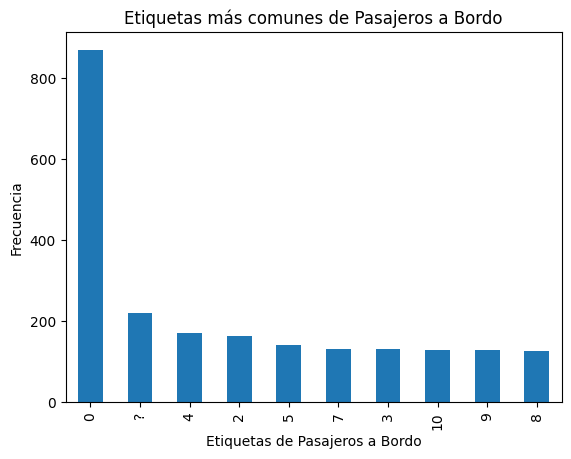

In [29]:
passengers_counts = aviones['PASAJEROS A BORDO'].value_counts()

# Muestra las 10 etiquetas más comunes
print(passengers_counts.head(10))

# Muestra todas las etiquetas con su frecuencia
print(passengers_counts)

# Gráfico de barras de las 10 etiquetas más comunes
passengers_counts.head(10).plot(kind='bar')
plt.xlabel('Etiquetas de Pasajeros a Bordo')
plt.ylabel('Frecuencia')
plt.title('Etiquetas más comunes de Pasajeros a Bordo')
plt.show()


¿Cual es la tasa de supervivencia en los aviones?

In [79]:
# Convertir la columna 'cantidad de fallecidos' a tipo entero con manejo de errores
aviones['cantidad de fallecidos'] = pd.to_numeric(aviones['cantidad de fallecidos'], errors='coerce')

# Convertir la columna 'PASAJEROS A BORDO' a tipo entero con manejo de errores
aviones['PASAJEROS A BORDO'] = pd.to_numeric(aviones['PASAJEROS A BORDO'], errors='coerce')

# Reemplazar los valores no finitos (NaN o infinitos) por ceros (opcional)
aviones['cantidad de fallecidos'].fillna(0, inplace=True)
aviones['PASAJEROS A BORDO'].fillna(0, inplace=True)

# Convertir las columnas a tipo entero
aviones['cantidad de fallecidos'] = aviones['cantidad de fallecidos'].astype(int)
aviones['PASAJEROS A BORDO'] = aviones['PASAJEROS A BORDO'].astype(int)



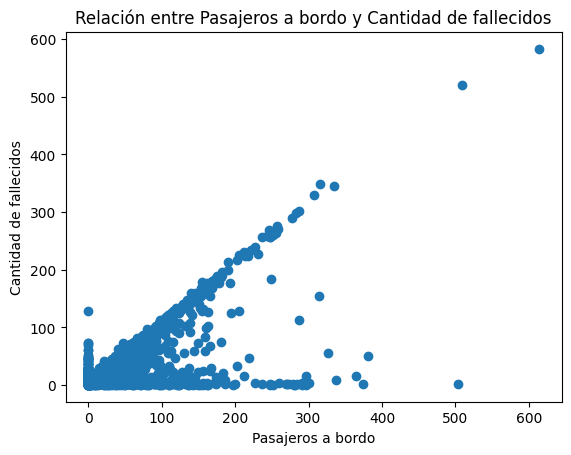

In [81]:
# Crear el scatter plot
plt.scatter(aviones['PASAJEROS A BORDO'], aviones['cantidad de fallecidos'])

# Establecer títulos y etiquetas de los ejes
plt.title('Relación entre Pasajeros a bordo y Cantidad de fallecidos')
plt.xlabel('Pasajeros a bordo')
plt.ylabel('Cantidad de fallecidos')

# Mostrar el scatter plot
plt.show()

Ahora veremos el porcentaje de supervivencia de acuerdo con todas las personas abordo 

In [101]:
# Convertir la columna 'all_aboard' a tipo entero con manejo de errores
aviones['all_aboard'] = pd.to_numeric(aviones['all_aboard'], errors='coerce')

# Reemplazar los valores no finitos (NaN o infinitos) por ceros
aviones['all_aboard'].fillna(0, inplace=True)

# Convertir la columna a tipo entero
aviones['all_aboard'] = aviones['all_aboard'].astype(int)


In [103]:
# Calcular el porcentaje de supervivencia
aviones['porcentaje_supervivencia'] = (1 - (aviones['cantidad de fallecidos'] / aviones['all_aboard'])) * 100

# Manejar los valores faltantes o NA en el porcentaje de supervivencia
aviones['porcentaje_supervivencia'].fillna(0, inplace=True)


In [146]:
aviones['año'] = aviones['año'].astype(int)

intervalo_10_anios = aviones.groupby((aviones['año'] // 5) * 5)['porcentaje_supervivencia'].mean()


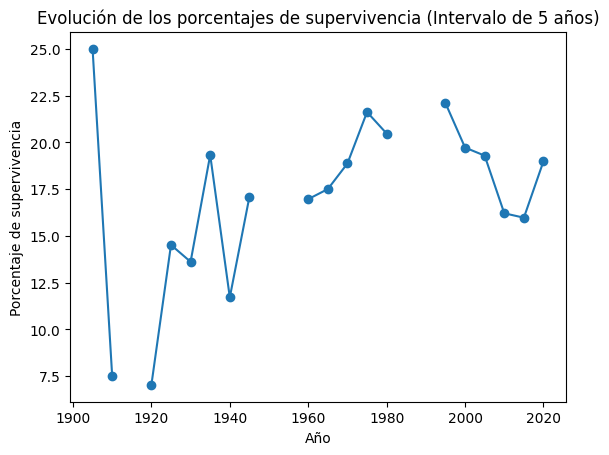

In [147]:

plt.plot(intervalo_10_anios.index, intervalo_10_anios.values, marker='o')
plt.title('Evolución de los porcentajes de supervivencia (Intervalo de 5 años)')
plt.xlabel('Año')
plt.ylabel('Porcentaje de supervivencia')
plt.show()


Queremos saber cual es la media de supervivencia

In [149]:
# Filtrar valores negativos en la columna 'porcentaje_supervivencia'
porcentaje_supervivencia_filtrado = aviones.loc[aviones['porcentaje_supervivencia'] >= 0, 'porcentaje_supervivencia']

# Calcular la media del porcentaje de supervivencia
media_supervivencia = porcentaje_supervivencia_filtrado.mean()

media_supervivencia


18.181663994940866

Hagamos una comparacion entre los aviones de antes con los aviones actuales 

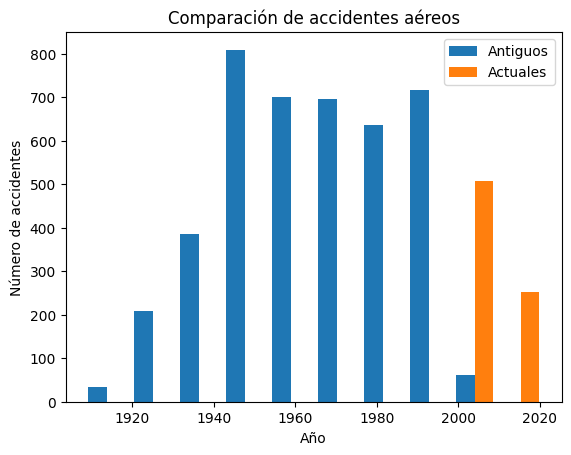

In [153]:
# Dividir los datos en dos grupos: antes de 1999 y a partir de 2000
aviones_antiguos = aviones[aviones['año'] <= 1999]
aviones_actuales = aviones[aviones['año'] >= 2000]


plt.hist([aviones_antiguos['año'], aviones_actuales['año']], bins=10, label=['Antiguos', 'Actuales'])
plt.title('Comparación de accidentes aéreos')
plt.xlabel('Año')
plt.ylabel('Número de accidentes')
plt.legend()
plt.show()


Veamos cuales son las aeronaves con mas accidentes a lo largo de los datos

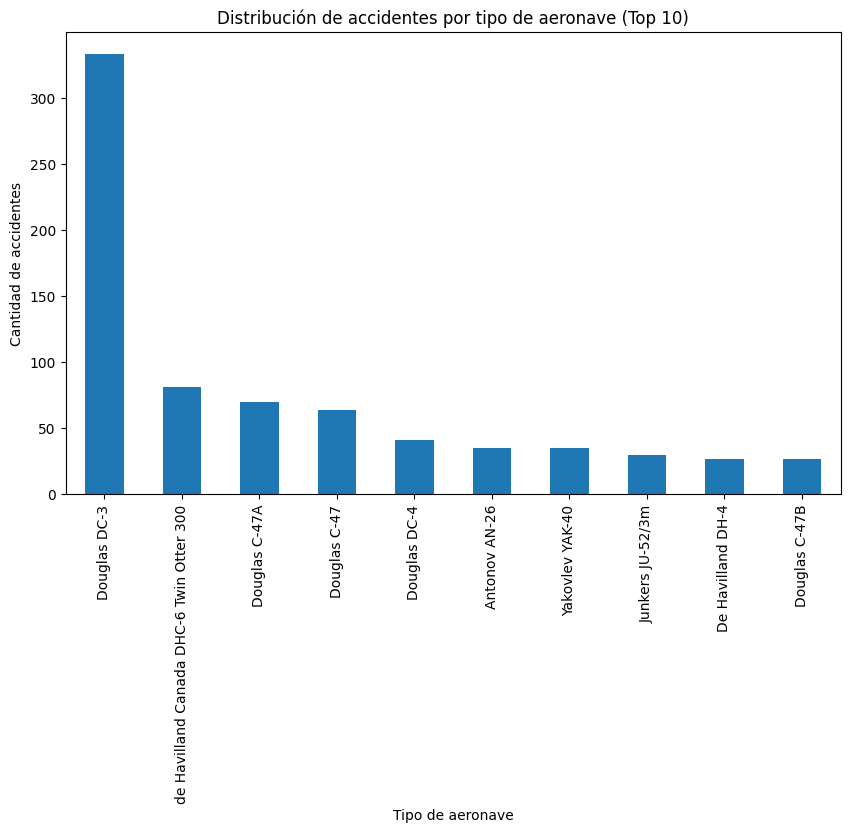

In [155]:
# Calcular la cantidad de accidentes por tipo de aeronave
accidentes_por_aeronave = aviones['ac_type'].value_counts().head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
accidentes_por_aeronave.plot(kind='bar')
plt.title('Distribución de accidentes por tipo de aeronave (Top 10)')
plt.xlabel('Tipo de aeronave')
plt.ylabel('Cantidad de accidentes')
plt.xticks(rotation=90)
plt.show()


Con esto podemos notar que existia una relacion con el tipo de nave y los accidentes ya que existe una gran diferencia entre la primera y las demas 


In [156]:
aviones.to_csv('C:/Users/PC/Desktop/Proyecto2/aviones.csv', index=False)